In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

In [ ]:
avg = 1
std_dev = 0.1
num_reps = 500
num_simulation = 1000

In [ ]:
pct_to_target = np.random.normal(avg,std_dev,num_reps).round(2)

In [ ]:
pct_to_target[0:10]

array([0.94, 1.17, 0.94, 1.04, 1.13, 1.04, 1.  , 0.81, 0.85, 1.07])

In [ ]:
sales_target_values = [75000,100000,200000,300000,400000,500000]
sales_target_pro = [.3,.3,.2,.1,.05,.05]
sales_target = np.random.choice(sales_target_values,size=num_reps,p=sales_target_pro)

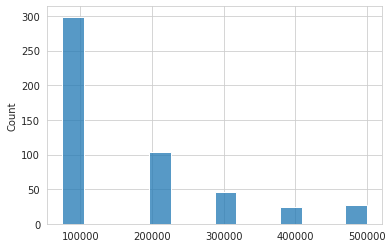

In [ ]:
sns.histplot(sales_target)

In [ ]:
df = pd.DataFrame(index = range(num_reps),data={'Pct_To_Target':pct_to_target,'Sales_Target':sales_target})
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [ ]:
df.head()

,Pct_To_Target,Sales_Target,Sales
0,0.96,100000,96000.0
1,1.20,75000,90000.0
2,0.90,75000,67500.0
3,1.09,75000,81750.0
4,0.92,500000,460000.0


In [ ]:
def calc_commission_rate(x):
  if x<=.9:
    return .02
  if x<=.99:
    return .03
  else:
    return .04

In [ ]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [ ]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.96,100000,96000.0,0.03,2880.0
1,1.20,75000,90000.0,0.04,3600.0
2,0.90,75000,67500.0,0.02,1350.0
3,1.09,75000,81750.0,0.04,3270.0
4,0.92,500000,460000.0,0.03,13800.0


In [ ]:
# Define a list to keep all the results from each simulationtha
all_states = []

# Loop through many simulations
for i in range(num_simulation):
  # choose random inputs for the sales targets and percent to target
  sales_target = np.random.choice(sales_target_values,size=num_reps,p=sales_target_pro)
  pct_to_target = np.random.normal(avg,std_dev,num_reps).round(2)

  # Build the dataframe based on the inputs and number of reps
  df = pd.DataFrame(index = range(num_reps),data={'Pct_To_Target':pct_to_target, 'Sales_Target': sales_target})
  
  # Back into the sales number using the percent to target rate
  df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

  # Determine the commissions rate and calculate it
  df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
  df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

  # We want to track sales,commission amounts and sales targets over all the simulations
  all_states.append([df['Sales'].sum().round(0),df['Commission_Amount'].sum().round(0),df['Sales_Target'].sum().round(0)])

In [ ]:
results_df = pd.DataFrame.from_records(all_states,columns=['Sales','Commission_Amount','Sales_Target'])

In [ ]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,678,448.5","2,857,510.718","83,665,900.0"
std,"2,623,981.466485433","100,030.65560838794","2,585,848.033054156"
min,"76,780,000.0","2,585,402.0","76,800,000.0"
25%,"81,901,375.0","2,791,228.25","81,893,750.0"
50%,"83,657,500.0","2,851,718.0","83,700,000.0"
75%,"85,554,500.0","2,926,311.25","85,400,000.0"
max,"92,967,500.0","3,219,995.0","92,175,000.0"


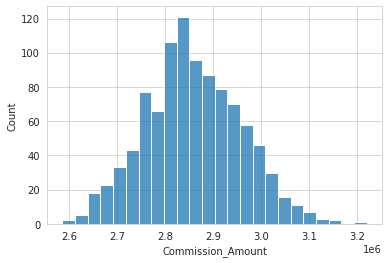

In [ ]:
sns.histplot(results_df['Commission_Amount'])

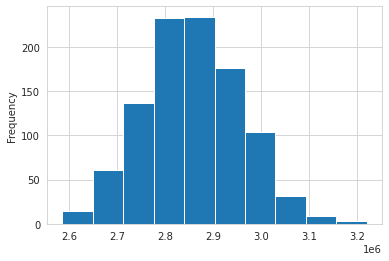

In [ ]:
results_df['Commission_Amount'].plot(kind = 'hist')

In [ ]:
np.random.normal()

In [ ]:
np.take()

In [ ]:
avg = 1
std_dev = 0.1
num_reps = 500
num_simulation = 1000
num_reps = 500
num_simulations  =10000

In [ ]:
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [ ]:
pct_to_target.shape

(500, 10000)

In [ ]:
 np.digitize(pct_to_target, bins=[.9, .99, 10])

array([[1, 1, 1, ..., 2, 1, 0],
       [2, 1, 2, ..., 2, 2, 1],
       [2, 2, 2, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [2, 1, 0, ..., 0, 2, 1],
       [2, 2, 1, ..., 0, 2, 1]])

In [ ]:
commission_percentages= np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [ ]:
commission_percentages.shape

(500, 10000)

In [ ]:
sales_target = sales_target.reshape(500,1)

In [ ]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [ ]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2962750.0
1,3046000.0
2,2971250.0
3,3003500.0
4,3001250.0


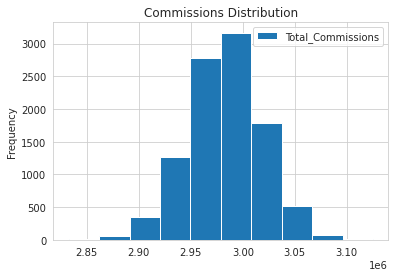

In [ ]:
df.plot(kind='hist', title='Commissions Distribution')